# Neural Network For Handwritten Digits Classification 

In [1]:
#import paskages

import tensorflow as tf 
from tensorflow import keras

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Load datasets and split
(X_train ,y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()

In [3]:
#length X_train 
len(X_train)

60000

In [4]:
#length X_test
len(X_test)

10000

In [5]:
#shape sample image 
X_train[0].shape

(28, 28)

In [6]:
#normalization image
X_train= X_train/255
X_test= X_test/255

<Figure size 640x480 with 0 Axes>

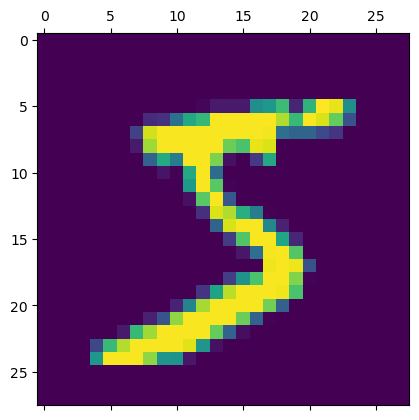

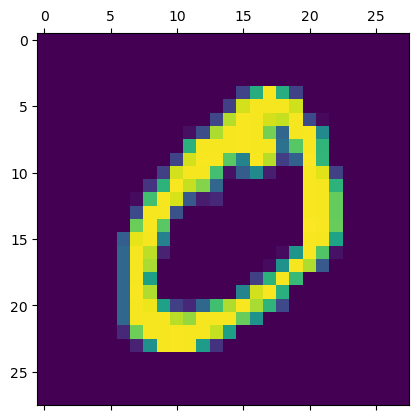

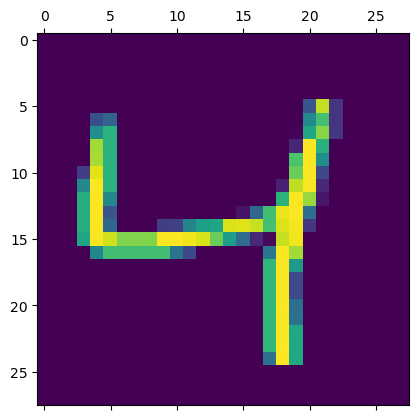

In [7]:
#show sample  image 
plt.figure() 
plt.matshow(X_train[0])
plt.matshow(X_train[1])
plt.matshow(X_train[2])

plt.show()

In [8]:
y_train[:3]

array([5, 0, 4], dtype=uint8)

In [9]:
#reshape image
X_train_flatten = X_train.reshape(len(X_train) , 28*28)

X_test_flatten = X_test.reshape(len(X_test) , 28*28)

In [10]:
X_test_flatten.shape

(10000, 784)

In [11]:
X_train_flatten.shape

(60000, 784)

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10 , input_shape=(784,) ,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']            
  )

model.fit(X_train_flatten, y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4627 - accuracy: 0.8797
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3035 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2830 - accuracy: 0.9214
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9263


In [13]:
#Evaluation model
model.evaluate(X_test_flatten ,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2666 - accuracy: 0.9249


[0.2665872275829315, 0.9248999953269958]

In [14]:
#predicted X_test data 
y_predicted = model.predict(X_test_flatten)

313/313 [==============================] - 0s 1ms/step


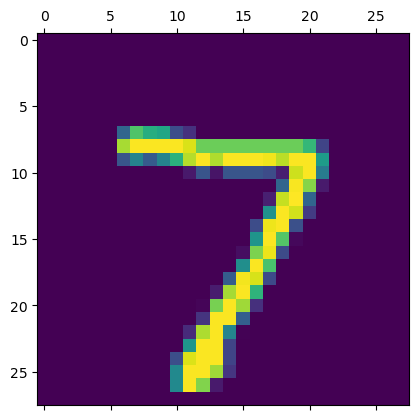

In [15]:
plt.matshow(X_test[0])

In [16]:
y_predicted[0]

array([2.9650871e-02, 4.2352488e-07, 5.0321892e-02, 9.6907353e-01,
       2.9264202e-03, 1.0682986e-01, 1.9081774e-06, 9.9978453e-01,
       7.6374210e-02, 6.7517215e-01], dtype=float32)

In [17]:
np.argmax(y_predicted[0])

7

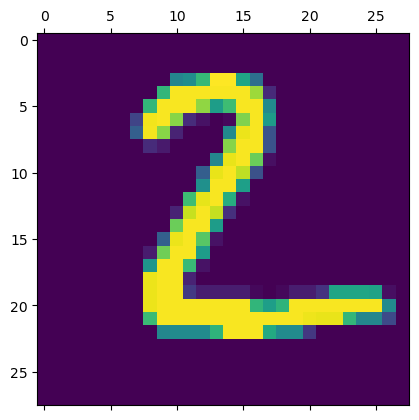

In [18]:
plt.matshow(X_test[1])

In [19]:
np.argmax(y_predicted[1])

2

In [20]:
y_predicted_labels = np.argmax(y_predicted, axis=1)


In [21]:
cm = tf.math.confusion_matrix(labels=y_test , predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   8,    9,  921,   16,    6,    3,   12,   10,   42,    5],
       [   3,    0,   19,  925,    0,   19,    2,   11,   25,    6],
       [   1,    1,    7,    1,  911,    0,   10,    4,    9,   38],
       [  11,    3,    4,   39,    9,  762,   17,    6,   35,    6],
       [  11,    3,    8,    1,    7,   11,  912,    2,    3,    0],
       [   1,    5,   23,    8,    6,    0,    0,  950,    3,   32],
       [   7,    8,    6,   19,    8,   22,   11,   12,  876,    5],
       [  10,    7,    2,   11,   27,    6,    0,   22,   10,  914]])>

Text(50.722222222222214, 0.5, 'Truth')

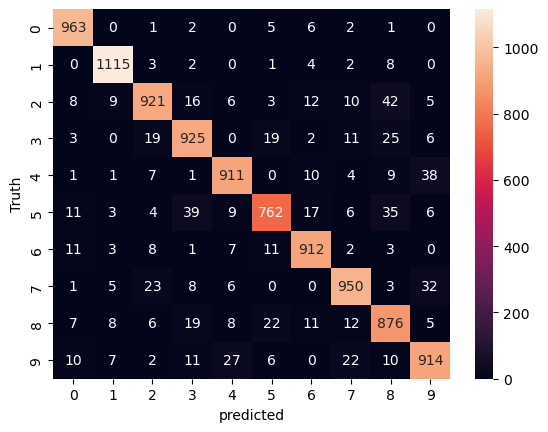

In [22]:
plt.figure()
sns.heatmap(cm , annot=True , fmt='d')
plt.xlabel("predicted")
plt.ylabel("Truth")

In [23]:
#Add hidden layer

In [24]:
model = keras.Sequential([
    keras.layers.Dense(100 , input_shape=(784,) ,activation='relu'),
    keras.layers.Dense(10 ,activation="sigmoid")
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']            
  )

model.fit(X_train_flatten, y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2800 - accuracy: 0.9211
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1291 - accuracy: 0.9620
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0895 - accuracy: 0.9727
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0682 - accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0539 - accuracy: 0.9833


In [25]:
model.evaluate(X_test_flatten ,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0769 - accuracy: 0.9760


[0.07689107209444046, 0.9760000109672546]

In [26]:
cm = tf.math.confusion_matrix(labels=y_test , predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   8,    9,  921,   16,    6,    3,   12,   10,   42,    5],
       [   3,    0,   19,  925,    0,   19,    2,   11,   25,    6],
       [   1,    1,    7,    1,  911,    0,   10,    4,    9,   38],
       [  11,    3,    4,   39,    9,  762,   17,    6,   35,    6],
       [  11,    3,    8,    1,    7,   11,  912,    2,    3,    0],
       [   1,    5,   23,    8,    6,    0,    0,  950,    3,   32],
       [   7,    8,    6,   19,    8,   22,   11,   12,  876,    5],
       [  10,    7,    2,   11,   27,    6,    0,   22,   10,  914]])>

Text(50.722222222222214, 0.5, 'Truth')

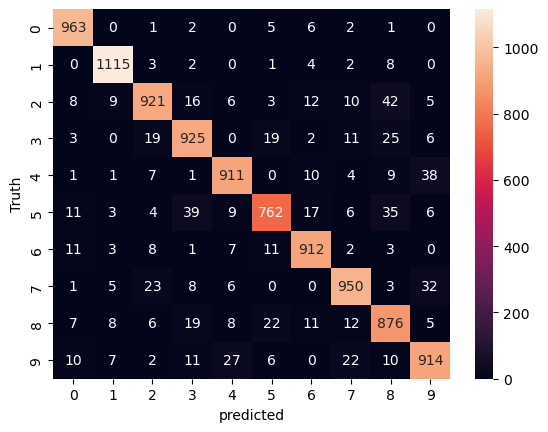

In [27]:
plt.figure()
sns.heatmap(cm , annot=True , fmt='d')
plt.xlabel("predicted")
plt.ylabel("Truth")

In [28]:

#Layer flatten

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100 ,activation='relu'),
    keras.layers.Dense(10 ,activation="sigmoid")
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']            
  )

model.fit(X_train, y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2774 - accuracy: 0.9223
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1270 - accuracy: 0.9628
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0871 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0661 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0523 - accuracy: 0.9835
